In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

%config InlineBackend.figure_formats = ['svg']

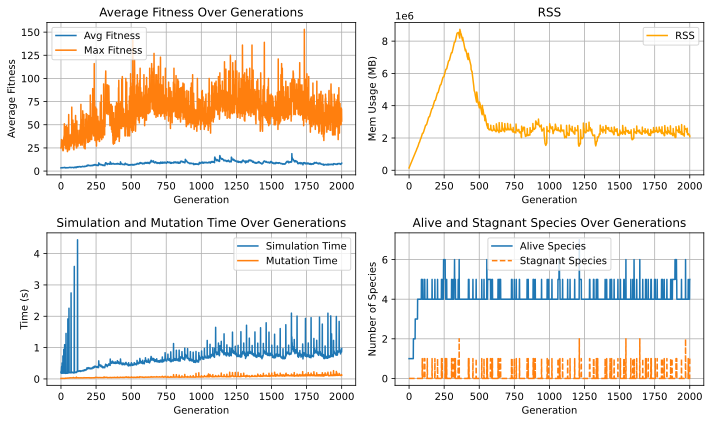

In [7]:
path = '/Users/so/Documents/projects/personal/2048_AI/logs/2024-12-30_14-44-17.v2.txt'
with open(path, 'r') as f:
    log_data = f.read()

# Convert log data into a list of dictionaries
lines = log_data.strip().split('\n')
data = [eval(line) for line in lines]

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Create a 2x2 subplot for all the graphs
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot avg_fitness over generations
axes[0, 0].plot(df["current_gen"], df["avg_fitness"], label="Avg Fitness")
axes[0, 0].plot(df["current_gen"], df["max_fitness"], label="Max Fitness")
axes[0, 0].set_title("Average Fitness Over Generations")
axes[0, 0].set_xlabel("Generation")
axes[0, 0].set_ylabel("Average Fitness")
axes[0, 0].grid()
axes[0, 0].legend()

# Plot max_fitness over generations
axes[0, 1].plot(df["current_gen"], df["RSS"] / (1024 ** 1), label="RSS", color="orange")
# axes[0, 1].plot(df["current_gen"], df["VMS"] / (1024 ** 1), label="VMS", color="blue")
axes[0, 1].set_title("RSS")
axes[0, 1].set_xlabel("Generation")
axes[0, 1].set_ylabel("Mem Usage (MB)")
axes[0, 1].grid()
axes[0, 1].legend()

# Plot sim_time and mutate_time over generations (combined graph)
axes[1, 0].plot(df["current_gen"], df["sim_time"], label="Simulation Time")
axes[1, 0].plot(df["current_gen"], df["mutate_time"], label="Mutation Time")
axes[1, 0].set_title("Simulation and Mutation Time Over Generations")
axes[1, 0].set_xlabel("Generation")
axes[1, 0].set_ylabel("Time (s)")
axes[1, 0].grid()
axes[1, 0].legend()

# Plot alive_species and stagnant_species over generations (combined graph)
axes[1, 1].plot(df["current_gen"], df["alive_species"], label="Alive Species")
axes[1, 1].plot(df["current_gen"], df["stagnant_species"], label="Stagnant Species", linestyle="--")
axes[1, 1].set_title("Alive and Stagnant Species Over Generations")
axes[1, 1].set_xlabel("Generation")
axes[1, 1].set_ylabel("Number of Species")
axes[1, 1].grid()
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


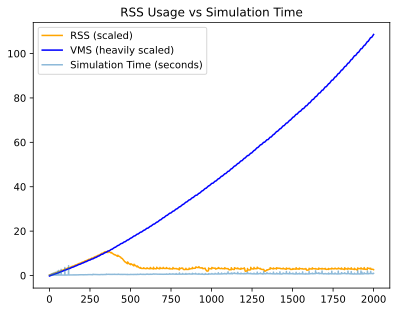

In [3]:
plt.plot(df["current_gen"], df["RSS"] / (1024 ** 1) / 10**5.9, label="RSS (scaled)", color="orange")
plt.plot(df["current_gen"], df["VMS"] / (1024 ** 1) / 10**5.9 - 519, label="VMS (heavily scaled)", color="blue")
plt.plot(df["current_gen"], df["sim_time"], label="Simulation Time (seconds)", alpha = 0.5)
plt.title('RSS Usage vs Simulation Time')
plt.legend();

In [57]:
import plotly.graph_objects as go

# Assuming df is a pandas DataFrame
fig = go.Figure()

# Add RSS (scaled) plot
fig.add_trace(
    go.Scatter(
        x=df["current_gen"],
        y=df["RSS"] / (1024 ** 1) / 10**5.9,
        mode='lines',
        name='RSS (scaled)',
        line=dict(color='orange')
    )
)

# Add Simulation Time plot
fig.add_trace(
    go.Scatter(
        x=df["current_gen"],
        y=df["sim_time"],
        mode='lines',
        name='Simulation Time (seconds)',
        line=dict(color='blue'),
        opacity=0.5
    )
)

# Update layout
fig.update_layout(
    title='RSS Usage vs Simulation Time',
    xaxis_title='Current Generation',
    yaxis_title='Values',
    legend=dict(x=0.01, y=0.99),  # Place legend top-left
)

# Show the plot
fig.show()


In [58]:
spike_index = df[df['sim_time'] >= 4].index

diffs = df.iloc[spike_index]['RSS'].values - df.iloc[spike_index - 1]['RSS'].values
diffs = diffs / (1024 ** 2)
diffs

array([  26.78125 ,   28.15625 ,  843.734375, 1214.03125 ])

In [52]:
df.iloc[spike_index]['RSS'].values 

117    2751332352
135    3135963136
156    3663839232
180    3465822208
Name: RSS, dtype: int64

In [50]:
df.iloc[spike_index - 1]['RSS']

116    2723250176
134    3106439168
155    2779119616
179    2192818176
Name: RSS, dtype: int64

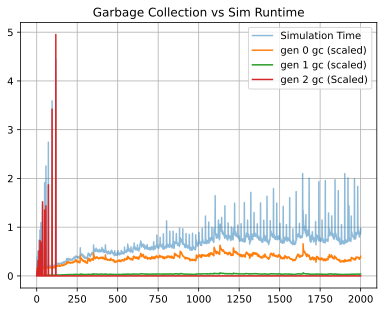

In [4]:
# Plot max_fitness over generations
plt.plot(df["current_gen"], df["sim_time"], label="Simulation Time", alpha = 0.5)
plt.plot(df["current_gen"], df["gc_gen0"] / 300000, label="gen 0 gc (scaled)")
plt.plot(df["current_gen"], df["gc_gen1"] / 300000, label="gen 1 gc (scaled)")
# plt.plot(df["current_gen"], df["gc_gen2"], label="gen 2 gc (scaled)")
plt.plot(df["current_gen"], df["gc_gen2"] / 300000, label="gen 2 gc (Scaled)")
plt.title('Garbage Collection vs Sim Runtime')
plt.grid()
plt.legend();

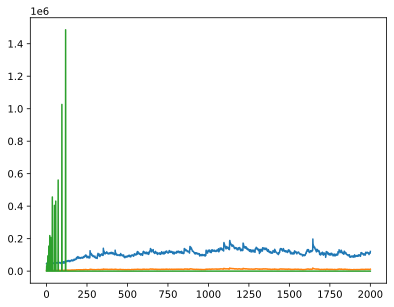

In [5]:
plt.plot(df["current_gen"], df["gc_gen0"], label="gen 0 gc (scaled)")
plt.plot(df["current_gen"], df["gc_gen1"], label="gen 1 gc (scaled)")
plt.plot(df["current_gen"], df["gc_gen2"], label="gen 2 gc (Scaled)")

In [6]:
df["gc_gen0"].mean()

108863.83208395803